### Aprendizado de Máquina Estatístico
Docente: Dra. Cibele Russo
Aluno: Dionisio Alves da Silva Neto

Exercício 2 - Lista 3

Apresentar um estudo comparativo, em termos do tempo computacional e desempenho, dos métodos ensemble sobre o algoritmo de Árvore de Decisão, na tarefa de classificação de K classes. 

In [1]:
## Bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Métricas dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Simulação de uma base de dados

Para a simulação da base de dados, consideraremos a estrutura de um modelo multinomial, com 4 classes, com a contribuição de 12 covariáveis preditoras sob a contribuição de diferentes distribuições de probabilidade.

In [4]:
## semente
np.random.seed(12)

n = 1000000 ## base com 1 milhão de valores

## Gerar valores de um espaço linear.

X1 = np.random.normal(loc=10,scale=2,size=n) ## Normal
X2 = np.random.gamma(shape=2,scale=3,size=n) ## Gamma
X3 = np.random.poisson(lam=5,size=n)         ## Poisson
X4 = np.random.binomial(n=1,p=0.68,size=n)   ## Bernoulli, 0 e 1
X5 = np.random.binomial(n=1,p=0.35,size=n)   ## Bernoulli, 0 e 1
X6 = np.random.binomial(n=1,p=0.70,size=n)   ## Bernoulli, 0 e 1
X7 = np.random.normal(loc=65.20,scale=5,size=n) ## Normal
X8 = np.random.poisson(lam=10,size=n)         ## Poisson
X9 = np.random.normal(loc=10,scale=2,size=n)  ## Normal
X10 = np.random.normal(loc=10,scale=2,size=n) ## Normal
X11 = np.random.beta(a=2,b=4,size=n)                 ## beta
X12 = np.random.beta(a=10,b=10,size=n)               ## beta

O controle das classes é feita pelo ajuste do intercepto e da contribuição de cada preditora da combinação linear. Os coeficientes que apresentarem a maior soma positiva entre os pesos e intercepto apresentarão maior frequência na quantificação de classes da variável resposta. O controle desta soma também deve ser por tentativa e erro para a quantidade na classe 1 (categoria de referência) seja consequência das demais.

In [5]:
lp2 = 12 - 0.1*X1 + 0.1*X2 + 0.1*X3 + 0.1*X4 + 0.3*X5 + 0.1*X6 + 0.1*X7 - 0.9*X8 + 0.022*X9 - 0.54*X10 + 0.58*X11 - 0.7*X12
lp3 = 55 - 0.2*X1 + 0.1*X2 + 0.14*X3 + 0.2*X4 + 0.1*X5 + 0.7*X6 - 0.7*X7 + 0.11*X8 - 0.11*X9 - 0.45*X10 + 0.17*X11 + 0.3*X12
lp4 = -25 + 0.2*X1 + 0.1*X2 - 0.24*X3 + 0.2*X4 + 0.2*X5+ 0.08*X6 + 0.5*X7 - 0.5*X8 + 0.24*X9 - 0.45*X10 + 0.04*X11 - 1.2*X12

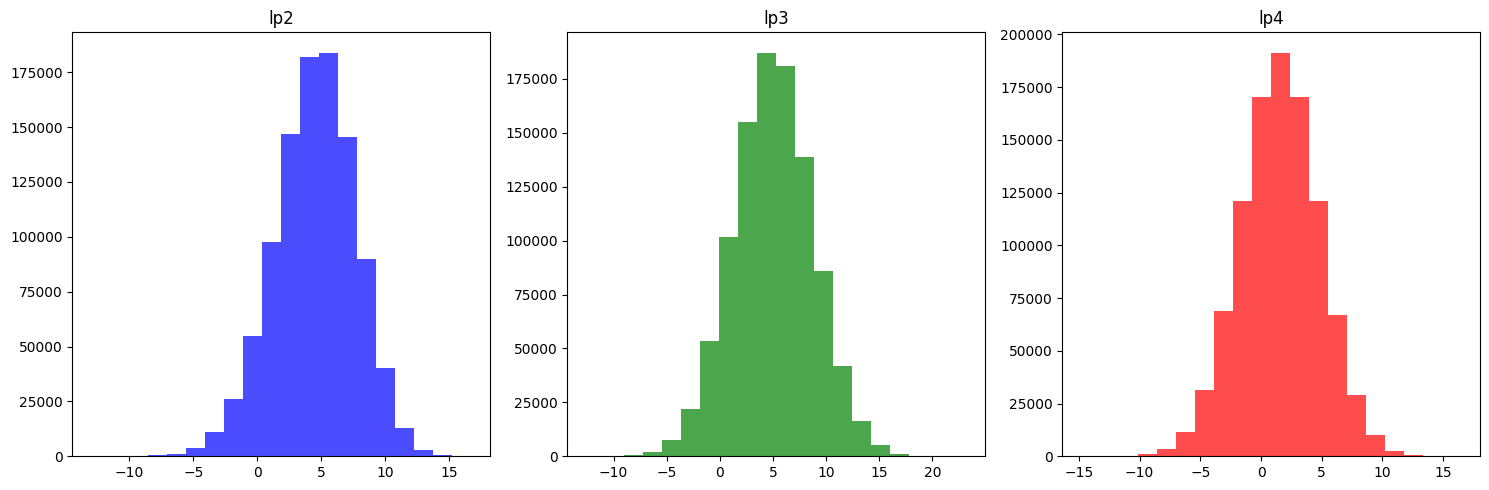

In [6]:
# Criar uma figura com quatro subplots em uma grade 2x2
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotar o primeiro histograma
axes[0].hist(lp2, bins=20, color='blue', alpha=0.7)
axes[0].set_title('lp2')

# Plotar o segundo histograma
axes[1].hist(lp3, bins=20, color='green', alpha=0.7)
axes[1].set_title('lp3')

# Plotar o terceiro histograma
axes[2].hist(lp4, bins=20, color='red', alpha=0.7)
axes[2].set_title('lp4')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibir a figura
plt.show()

In [7]:
# O denominador, garante que as probabilidade somam 1
den = (1 + np.exp(lp2) + np.exp(lp3) + np.exp(lp4))
p1 = 1/den
p2 = np.exp(lp2)/den
p3 = np.exp(lp3)/den
p4 = np.exp(lp4)/den
P = pd.concat([pd.Series(p1),pd.Series(p2),pd.Series(p3),pd.Series(p4)],axis=1)
P.columns = ["p1","p2","p3","p4"]

P ## visualizando a probabilidade de pertecimento de cada indivíduo em cada classe.

,p1,p2,p3,p4
0,0.000099,0.000030,0.999866,0.000006
1,0.000218,0.000339,0.999440,0.000004
2,0.003741,0.002688,0.993327,0.000244
3,0.002599,0.734018,0.045189,0.218194
4,0.002929,0.005830,0.990237,0.001004
...,...,...,...,...
999995,0.000856,0.938884,0.000805,0.059454
999996,0.000812,0.053341,0.945605,0.000242
999997,0.000846,0.495475,0.002352,0.501327
999998,0.000273,0.008356,0.991223,0.000149


In [8]:
## simular as classes dos indivíduos baseando-se na probabilidade gerada no modelo multinomial
tipo_classes = [1,2,3,4]

classe = n*[np.nan]
for individuo in range(n):
    classe[individuo] = np.random.choice(tipo_classes,p=P.iloc[individuo,:])

Visualização da proporção de cada classe no conjunto de dados

In [9]:
classe = pd.Series(classe)
classe.value_counts(normalize=True)

3    0.510705
2    0.367757
4    0.113940
1    0.007598
Name: proportion, dtype: float64

Na distribuição de frequência acima, podemos visualizar como o nosso conjunto de dados está distribuído para as quatro classes em objetivo. A classe mais recorrente é a 3 (51,0705%), seguida pela 2 (37,7757%), 4 (11,3940%) e 1 (0,7598%).

Ou seja, é perceptível a predominância da classe 3 e os desbalanceamentos entre as classes.

#### Avaliação dos modelos Ensemble em grandes bases de dados:
- Árvore de Decisão (modelo base)
- Random Forest
- Bagging
- Boosting

In [10]:
## Carregando os modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
## Separação de dados em treino e teste
X = pd.DataFrame(np.vstack((X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12))).T
X.columns = ["X1", "X2", "X3", "X4", "X5", "X6","X7", "X8", "X9", "X10", "X11", "X12"]

In [12]:
X.shape, classe.shape

((1000000, 12), (1000000,))

Separação entre treino e teste

In [13]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,classe, test_size=0.3, random_state=12)

In [14]:
X_treino.shape, X_teste.shape

((700000, 12), (300000, 12))

In [15]:
import time

In [16]:
## Declarando os modelos
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
bagc = BaggingClassifier()
adaboostc = AdaBoostClassifier() ## para o boosting, priorizamos o algoritmo visto em sala de aula

In [17]:
## Treinamento e predição no conjunto de teste
tinitdt = time.time()
dt.fit(X_treino,y_treino)
tenddt = time.time()

tinitrf = time.time()
rf.fit(X_treino,y_treino)
tendrf = time.time()

tinitbagc = time.time()
bagc.fit(X_treino,y_treino)
tendbagc = time.time()

tinitadaboostc = time.time()
adaboostc.fit(X_treino,y_treino)
tendadaboostc = time.time()


In [18]:
print(f"Tempo de execução (em segundos) da Àrvore de Decisão: {tenddt-tinitdt}")
print(f"Tempo de execução (em segundos) das Florestas Aleatórias: {tendrf-tinitrf}")
print(f"Tempo de execução (em segundos) do Classificador Bagging: {tendbagc-tinitbagc}")
print(f"Tempo de execução (em segundos) do Classificador Adaboosting: {tendadaboostc-tinitadaboostc}")

Tempo de execução (em segundos) da Àrvore de Decisão: 22.86027717590332
Tempo de execução (em segundos) das Florestas Aleatórias: 645.4446246623993
Tempo de execução (em segundos) do Classificador Bagging: 164.30154275894165
Tempo de execução (em segundos) do Classificador Adaboosting: 92.09032368659973


Dentre os métodos comparados, a Árvore de Decisão foi a mais rápida para a execução (22,86 segundos), seguido pelos métodos Adaboosting (92,09 segundos), Bagging (164,30 segundos) e Random Forest (645,44 segundos).

Em nosso estudo, percebemos que o classificador de Florestas Aleatórias foi o que mais demorou no processo de treinamento e o Classificador por Árvore de Decisão, foi o mais rápido para o treinamento. Um comentário importante pode ser feito sobre o processo de adaptação algoritmo de Adaboosting, o qual faz com que ele seja consideravelmente rápido no conjunto de treinamento com 700.000 observações.

### Avaliando as métricas de desempenho dos modelos

In [24]:
ypred_dt = dt.predict(X_teste)
ypred_rf = rf.predict(X_teste)
ypred_bagc = bagc.predict(X_teste)
ypred_adaboostc = adaboostc.predict(X_teste)

In [20]:
print(classification_report(y_pred=ypred_dt,y_true=y_teste)) ## Árvore de Decisão

              precision    recall  f1-score   support

           1       0.06      0.07      0.06      2335
           2       0.71      0.70      0.71    110640
           3       0.85      0.85      0.85    152981
           4       0.50      0.51      0.51     34044

    accuracy                           0.75    300000
   macro avg       0.53      0.53      0.53    300000
weighted avg       0.75      0.75      0.75    300000



In [21]:
print(classification_report(y_pred=ypred_rf,y_true=y_teste)) ## Florestas Aleatórias

              precision    recall  f1-score   support

           1       0.50      0.01      0.02      2335
           2       0.78      0.81      0.80    110640
           3       0.88      0.91      0.90    152981
           4       0.69      0.55      0.62     34044

    accuracy                           0.83    300000
   macro avg       0.71      0.57      0.58    300000
weighted avg       0.82      0.83      0.82    300000



In [22]:
print(classification_report(y_pred=ypred_bagc,y_true=y_teste)) ## Bagging

              precision    recall  f1-score   support

           1       0.23      0.04      0.07      2335
           2       0.75      0.81      0.78    110640
           3       0.88      0.89      0.88    152981
           4       0.66      0.51      0.58     34044

    accuracy                           0.81    300000
   macro avg       0.63      0.56      0.58    300000
weighted avg       0.80      0.81      0.80    300000



In [23]:
print(classification_report(y_pred=ypred_adaboostc,y_true=y_teste)) ## AdaBoosting

              precision    recall  f1-score   support

           1       0.41      0.02      0.04      2335
           2       0.78      0.80      0.79    110640
           3       0.88      0.91      0.89    152981
           4       0.67      0.57      0.62     34044

    accuracy                           0.82    300000
   macro avg       0.69      0.57      0.59    300000
weighted avg       0.82      0.82      0.82    300000



Pelo reporte da capacidade de predição dos modelos, podemos pontuar as seguintes observações:

- Pela acurácia geral nas classes, os métodos ensemble (Bagging, Adaboosting e Random Forest) foram superiores à sua forma base (Árvore de Decisão), com a acuráricia chegando a 7% níveis percentuais acima da performance da Árvore de Decisão.

- Quando avaliamos as métricas mais detalhadas, como a precisão e a revocação para cada classe, notamos como os modelos puderam prever adequadamente de acordo com as classes no conjunto de dados.

- A precisão apresentou resultados melhores para o modelo de Florestas Aleatórias nas 4 classes, com a classe 3 (com a maior quantidade de dados disponíveis) apresentando resultados melhores. A precisão para a classe 1 (com menor quantidade de dados) foi a com menor valor em todos os métodos testados.

- Em termos da revocação, é perceptível a interferência na quantidade de exemplos para a bom desempenho dos modelos. As classes 2 e 3 (predominantes no conjunto de dados) apresentaram valores percentuais acima de 80, em todos os métodos ensemble, enquanto que a classe 1 (com menor quantidade de dados) apresentou valores péssimos para a revocação. Ou seja, os métodos ensemble, e também a árvore de decisão, não foram capazes de prever corretamente para os reais valores da classe 1 dentre os valores reais para tal categoria.

- Em conclusão, de acordo com o tempo computacional e o desempenho nas métricas de classificação, o modelo escolhido para a previsão nos dados gerados sob o ambiente de simulação foi o método ensemble Adaboosting pelo tempo de treinamento (92,0903 segundos), o qual foi, aproximadamente, 70 segundos a mais do que o seu modelo base e, o mesmo performou de forma supeior em relação à Árvore de Decisão. Pela sua semelhança entre as previsões dos métodos ensemble, consideramos como diferencial a sua rapidez no processo de treinamento sobre o Bagging e as Florestas Aleatórias.

#### Cenário para $n=5.000.000$, com menos preditoras e classes relativamanete balanceadas.

In [25]:
## semente
np.random.seed(12)

## Gerar valores de um espaço linear.
n = 5000000
X1 = np.random.normal(loc=10,scale=2,size=n) ## Normal
X2 = np.random.gamma(shape=2,scale=3,size=n) ## Gamma
X3 = np.random.poisson(lam=5,size=n)         ## Poisson
X4 = np.random.binomial(n=1,p=0.68,size=n)   ## Bernoulli, 0 e 1
X5 = np.random.binomial(n=1,p=0.35,size=n)   ## Bernoulli, 0 e 1


lp2 = -0.3 - 0.1*X1 + 0.1*X2 + 0.1*X3 + 0.1*X4 + 0.3*X5
lp3 = 0.75 - 0.2*X1 + 0.1*X2 + 0.14*X3 + 0.2*X4 + 0.1*X5
lp4 = -1.2 + 0.2*X1 + 0.1*X2 - 0.24*X3 + 0.2*X4 + 0.2*X5

# O denominador, garante que as probabilidade somam 1
den = (1 + np.exp(lp2) + np.exp(lp3) + np.exp(lp4))
p1 = 1/den
p2 = np.exp(lp2)/den
p3 = np.exp(lp3)/den
p4 = np.exp(lp4)/den
P = pd.concat([pd.Series(p1),pd.Series(p2),pd.Series(p3),pd.Series(p4)],axis=1)
P.columns = ["p1","p2","p3","p4"]

tipo_classes = [1,2,3,4]

classe = n*[np.nan]
for individuo in range(n):
    classe[individuo] = np.random.choice(tipo_classes,p=P.iloc[individuo,:])

classe = pd.Series(classe)
classe.value_counts(normalize=True)

4    0.338773
3    0.266390
1    0.200990
2    0.193847
Name: proportion, dtype: float64

Para o segundo banco de dados gerado, percebe-se a maior aproximação na proporção de cada classe. Com uma leve predominância da classe 4 dentre as demais.

In [26]:
## Separação de dados em treino e teste
X = pd.DataFrame(np.vstack((X1,X2,X3,X4,X5))).T
X.columns = ["X1", "X2", "X3", "X4", "X5"]


X_treino, X_teste, y_treino, y_teste = train_test_split(X,classe, test_size=0.3, random_state=12)

## Treinamento e predição no conjunto de teste
tinitdt = time.time()
dt.fit(X_treino,y_treino)
tenddt = time.time()

tinitrf = time.time()
rf.fit(X_treino,y_treino)
tendrf = time.time()

tinitbagc = time.time()
bagc.fit(X_treino,y_treino)
tendbagc = time.time()

tinitadaboostc = time.time()

adaboostc.fit(X_treino,y_treino)
tendadaboostc = time.time()

print(f"Tempo de execução (em segundos) da Àrvore de Decisão: {tenddt-tinitdt}")
print(f"Tempo de execução (em segundos) das Florestas Aleatórias: {tendrf-tinitrf}")
print(f"Tempo de execução (em segundos) do Classificador Bagging: {tendbagc-tinitbagc}")
print(f"Tempo de execução (em segundos) do Classificador Adaboosting: {tendadaboostc-tinitadaboostc}")

Tempo de execução (em segundos) da Àrvore de Decisão: 54.43984341621399
Tempo de execução (em segundos) das Florestas Aleatórias: 2466.6901631355286
Tempo de execução (em segundos) do Classificador Bagging: 409.4696023464203
Tempo de execução (em segundos) do Classificador Adaboosting: 194.85437774658203


Quando consideramos o cenário com $n=5.000.000$ notamos qua os métodos levaram muito mais tempo para finalizar o processo de treinamaneto na base de dados, mesmo diminuindo a quandidade de preditoras no processo. Todavia, ainda pernamanecemos com o cenário no qual a Árvore de Decisão sendo o algoritmo mais rápido (54 segundos), seguido pela pelo Adaboosting (194,85 segundos). O classsificador bagging levou 409 segundos para ser executado e o método de Florestas Aleatórias levou 2.466,69 segundos para ser executado, ou seja, para as florestas aleatórias, com o tamanho amostral muito grande, o processo de treinamento tende a ser bastante demorado.  

In [27]:
## Predições dos modelos
ypred_dt = dt.predict(X_teste)
ypred_rf = rf.predict(X_teste)
ypred_bagc = bagc.predict(X_teste)
ypred_adaboostc = adaboostc.predict(X_teste)

Avaliação das métricas de desempenho, para $n = 10.000.000$

In [28]:
print(classification_report(y_pred=ypred_dt,y_true=y_teste)) ## Árvore de Decisão

              precision    recall  f1-score   support

           1       0.22      0.22      0.22    301493
           2       0.21      0.21      0.21    291152
           3       0.32      0.32      0.32    399885
           4       0.43      0.43      0.43    507470

    accuracy                           0.32   1500000
   macro avg       0.30      0.30      0.30   1500000
weighted avg       0.32      0.32      0.32   1500000



In [29]:
print(classification_report(y_pred=ypred_rf,y_true=y_teste)) ## Floresta Aleatória

              precision    recall  f1-score   support

           1       0.24      0.20      0.22    301493
           2       0.22      0.18      0.20    291152
           3       0.35      0.37      0.36    399885
           4       0.46      0.55      0.50    507470

    accuracy                           0.36   1500000
   macro avg       0.32      0.32      0.32   1500000
weighted avg       0.34      0.36      0.35   1500000



In [30]:
print(classification_report(y_pred=ypred_bagc,y_true=y_teste)) ## Bagging

              precision    recall  f1-score   support

           1       0.23      0.23      0.23    301493
           2       0.22      0.20      0.21    291152
           3       0.34      0.34      0.34    399885
           4       0.47      0.49      0.48    507470

    accuracy                           0.34   1500000
   macro avg       0.32      0.32      0.32   1500000
weighted avg       0.34      0.34      0.34   1500000



In [31]:
print(classification_report(y_pred=ypred_adaboostc,y_true=y_teste)) ## Boosting

              precision    recall  f1-score   support

           1       0.31      0.08      0.13    301493
           2       0.31      0.00      0.00    291152
           3       0.39      0.57      0.46    399885
           4       0.47      0.77      0.58    507470

    accuracy                           0.43   1500000
   macro avg       0.37      0.35      0.29   1500000
weighted avg       0.38      0.43      0.35   1500000



- De acordo com a acurácia geral dos modelos de Aprendizado de Máquina, no cenário com menos preditoras e com o tamanho amostral maior, podemos visualizar a superioridade do algoritmo de Adaboosting (43%) dentre os demais modelos em avaliação, os quais apresentaram valores para a acurária em torno de 32% a 36%. Embora, haja a necessidade de melhorar a configuração das técnicas para um aumento desta medida global;

- Quando avaliamos mais detalhadamente, através da precisão, também é possível visualizar o melhor desempenho do algoritmo Adaboosting ao apresentar valores para a precisão superioriores as demais técnicas, isto é, para os valores preditos como pertencentes a cada uma das classes, esta metodologia é a que melhor prevê corretamente. Como as classes estão relativamente balanceadas, apenas a classe com maior exemplos (classe 4) apresenta uma leve vantagem na métrica em relação as demais.

- Para a métrica de revocação, o método Adaboosting não se mostra tão adequado pois na predição dos valores reais das classes 1 e 2, o algoritmo quase não acerta na tarefa de classificação. As técnicas de Bagging e Florestas Aleatórias, são as que se saem melhor tando para as classes 1 e 2 quanto para as demais em termos da revocação.

- Em conclusão, em termos da rapidez computacional e desemepenho nas métricas de classificação, podemos eleger as técnicas de Bagging e Adaboosting como as mais adequadas para o segundo banco de dados gerados, com o maior tamanho amostral e menor conjunto de preditoras. Para uma melhor acurácia e precisão, podemos adotar o método Adaboosting como mais adequado, paro a revocação, é melhor utilizarmos do método de bagging. Porém, ressaltamos a importância de melhorarmos o poder de predição para valores mais aceitáveis como obtidos no primeiro conjunto de dados.